<a href="https://colab.research.google.com/github/SilvanaCicchitti/challenge_telecom/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [124]:
import pandas as pd
import numpy as np
url='https://raw.githubusercontent.com/SilvanaCicchitti/challenge_telecom/refs/heads/main/TelecomX_Data.json'

In [125]:
datos= pd.read_json(url)
datos.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Diccionario


Diccionario de datos

**customerID**: número de identificación único de cada cliente

**Churn**: si el cliente dejó o no la empresa

**gender**: género (masculino y femenino)

**SeniorCitizen**: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

**Partner**: si el cliente tiene o no una pareja

**Dependents**: si el cliente tiene o no dependientes

**tenure**: meses de contrato del cliente

**PhoneService**: suscripción al servicio telefónico

**MultipleLines**: suscripción a más de una línea telefónica

**InternetService**: suscripción a un proveedor de internet

**OnlineSecurity**: suscripción adicional de seguridad en línea

**OnlineBackup**: suscripción adicional de respaldo en línea

**DeviceProtection**: suscripción adicional de protección del dispositivo

**TechSupport**: suscripción adicional de soporte técnico, menor tiempo de espera

**StreamingTV**: suscripción de televisión por cable

**StreamingMovies**: suscripción de streaming de películas

**Contract**: tipo de contrato

**PaperlessBilling**: si el cliente prefiere recibir la factura en línea

**PaymentMethod**: forma de pago

**Charges.Monthly**: total de todos los servicios del cliente por mes

**Charges.Total**: total gastado por el cliente

#🔧 Transformación

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [126]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [127]:
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [128]:
# Columnas simples
base = datos[['customerID', 'Churn']]

# Normalizar columnas anidadas
customer = pd.json_normalize(datos['customer'])
phone = pd.json_normalize(datos['phone'])
internet = pd.json_normalize(datos['internet'])
account = pd.json_normalize(datos['account'])

# Unir todo
datos_normalizados = pd.concat([base, customer, phone, internet, account], axis=1)

# Ver resultado
datos_normalizados.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6651,9139-TWBAS,No,Female,0,Yes,No,26,No,No phone service,DSL,...,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),47.85,1190.5
4483,6142-VSJQO,Yes,Female,0,Yes,Yes,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.35,44.35
1663,2361-FJWNO,No,Male,0,No,No,40,No,No phone service,DSL,...,Yes,No,Yes,No,No,One year,No,Credit card (automatic),36.00,1382.9
34,0052-YNYOT,No,Female,0,No,No,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.55,1343.4
1995,2824-DXNKN,No,Female,0,Yes,Yes,72,Yes,Yes,DSL,...,No,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),71.45,5025.85
5414,7402-EYFXX,No,Male,1,No,No,26,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.60,2404.1
401,0575-CUQOV,No,Male,1,Yes,No,60,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867
1719,2446-PLQVO,Yes,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,70.3
5074,6927-WTFIV,Yes,Male,1,No,No,20,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Credit card (automatic),71.30,1389.2
4940,6741-EGCBI,No,Male,1,No,No,30,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.50,2595.85


In [129]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [130]:
datos_normalizados.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [131]:
columnas2 = list(datos_normalizados.columns)
columnas2

for col in columnas2:
  #print(col)
  print(col, datos_normalizados[col].unique(), end='\n\n')

customerID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn ['No' 'Yes' '']

gender ['Female' 'Male']

SeniorCitizen [0 1]

Partner ['Yes' 'No']

Dependents ['Yes' 'No']

tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

PhoneService ['Yes' 'No']

MultipleLines ['No' 'Yes' 'No phone service']

InternetService ['DSL' 'Fiber optic' 'No']

OnlineSecurity ['No' 'Yes' 'No internet service']

OnlineBackup ['Yes' 'No' 'No internet service']

DeviceProtection ['No' 'Yes' 'No internet service']

TechSupport ['Yes' 'No' 'No internet service']

StreamingTV ['Yes' 'No' 'No internet service']

StreamingMovies ['No' 'Yes' 'No internet service']

Contract ['One year' 'Month-to-month' 'Two year']

PaperlessBilling ['Yes' 'No']

PaymentMethod ['Mailed check' 'Electronic check' 'Cre

### Valores nulos Churn

In [132]:
valores_blancos_vacios = datos_normalizados.apply(lambda x: x.astype(str).str.strip()=='').sum()
print(valores_blancos_vacios)

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


In [133]:
#churn valores en blanco
datos_normalizados['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [134]:
datos_normalizados['Churn'].isna().sum()

np.int64(0)

In [135]:
# Eliminar filas con 'Churn' vacía o con solo espacios
datos2 = datos_normalizados[datos_normalizados['Churn'].str.strip() != '']
datos2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [136]:
#verificación
datos2['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [137]:
# Eliminar filas con 'Charges.Total' vacía o con solo espacios
datos2 = datos2[datos2['Charges.Total'].str.strip() != '']
datos2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [138]:
#verificación
valores_blancos_vacios = datos2.apply(lambda x: x.astype(str).str.strip()=='').sum()
print(valores_blancos_vacios)

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [139]:
datos2.tail(5)
#quedaron mal los índices. Hay que resetear

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [140]:
datos2.reset_index(drop=True, inplace=True)
datos2.tail(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7027,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7028,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7029,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7030,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7031,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


### Pasar a int: tenure, Charges.Monthly, Charges.Total




In [141]:
#tenure tiene un espacio
#datos2['tenure'].isna().sum()
#datos2['Charges.Monthly'].isna().sum()
#datos2['Charges.Total'].isna().sum()

In [142]:
columnas_numericas= ['tenure', 'Charges.Monthly', 'Charges.Total']
datos2[columnas_numericas] = datos2[columnas_numericas].replace(' ', np.nan)

In [143]:
columnas_numericas= ['tenure', 'Charges.Monthly', 'Charges.Total']
datos2[columnas_numericas]= datos2[columnas_numericas].astype(np.float64)
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   float64
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


### Transformar a boleanos= Churn y Senior Citizen

Churn ['No' 'Yes']

SeniorCitizen [0 1]

Partner ['Yes' 'No']

Dependents ['Yes' 'No']

PhoneService ['Yes' 'No']

PaperlessBilling ['Yes' 'No']



In [144]:
#única columna es una serie // apply sólo para series
#2 o más columnas es un df // usar applymap
columnas_booleanas= ['Churn','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
datos2[columnas_booleanas]= datos2[columnas_booleanas].applymap(lambda x: x.replace('Yes', '1').replace('No', '0').strip())
datos2[columnas_booleanas]

<ipython-input-144-1421755652>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos2[columnas_booleanas]= datos2[columnas_booleanas].applymap(lambda x: x.replace('Yes', '1').replace('No', '0').strip())


,Churn,Partner,Dependents,PhoneService,PaperlessBilling
0,0,1,1,1,1
1,0,0,0,1,0
2,1,0,0,1,1
3,1,1,0,1,1
4,1,1,0,1,1
...,...,...,...,...,...
7027,0,0,0,1,0
7028,1,1,0,1,1
7029,0,0,0,1,1
7030,0,1,1,1,0


In [86]:
#SeniorCitizen [0 1]  no me dejaba porque es int
# Este código convierte a booleano ya que sólo hay 0 y 1
datos2['SeniorCitizen'] = datos2['SeniorCitizen'] == 1
datos2['SeniorCitizen']


,SeniorCitizen
0,False
1,False
2,False
3,True
4,True
...,...
7027,False
7028,False
7029,False
7030,False


In [147]:
#datos2[columnas_booleanas]= datos2[columnas_booleanas].astype(np.bool)
#datos2.info()
datos2[columnas_booleanas]= datos2[columnas_booleanas].astype(np.int64)
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   float64
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


### Columna de cuentas diarias

In [119]:
datos2['Charges.Daily'] = (datos2['Charges.Monthly'] / 30).round(2)
datos2.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,True,Female,0,True,True,9.0,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,True,Male,0,True,True,9.0,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,True,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,True,Male,0,True,True,4.0,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,True,Male,1,True,True,13.0,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,True,Female,1,True,True,3.0,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80


In [120]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   bool   
 5   Dependents        7032 non-null   bool   
 6   tenure            7032 non-null   float64
 7   PhoneService      7032 non-null   bool   
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


#📊 Carga y análisis

### Análisis descriptivo

In [121]:
datos2.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159891
std,0.368844,24.545260,30.085974,2266.771362,1.002955
min,0.000000,1.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.587500,401.450000,1.187500
50%,0.000000,29.000000,70.350000,1397.475000,2.340000
75%,0.000000,55.000000,89.862500,3794.737500,2.992500
max,1.000000,72.000000,118.750000,8684.800000,3.960000


### Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [122]:
import matplotlib.pyplot as plt

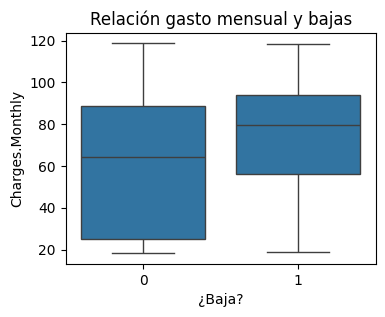

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
sns.boxplot(x='Churn', y='Charges.Monthly', data=datos2)
plt.title('Relación gasto mensual y bajas')
plt.xlabel('¿Baja?')
plt.ylabel('Charges.Monthly')
plt.show()

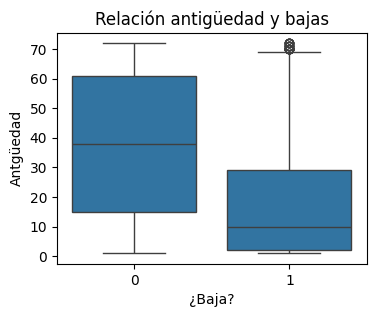

In [178]:
plt.figure(figsize=(4,3))
sns.boxplot(x='Churn', y='tenure', data=datos2)
plt.title('Relación antigüedad y bajas')
plt.xlabel('¿Baja?')
plt.ylabel('Antgüedad')
plt.show()



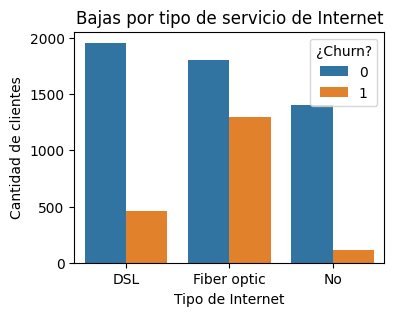

In [180]:

plt.figure(figsize=(4,3))
sns.countplot(data=datos2, x='InternetService', hue='Churn')
plt.title('Bajas por tipo de servicio de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Cantidad de clientes')
plt.legend(title='¿Churn?')
plt.show()

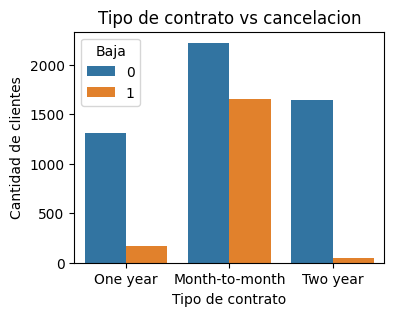

In [177]:
plt.figure(figsize=(4,3))
sns.countplot(x="Contract", hue="Churn", data=datos2)
plt.title("Tipo de contrato vs cancelacion")
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Baja')
plt.show()

#📄Informe final

🔹 Introducción: El ojbetivo de este análisis es descubrir qué factores influyen en la pérdida de clientes para poder evitarla.

🔹 Limpieza y Tratamiento de Datos: Los datos fueron descargados en bruto desde la base de datos y fueron corregidos y depurados para poder trabajar con ellos.

🔹 Análisis Exploratorio de Datos

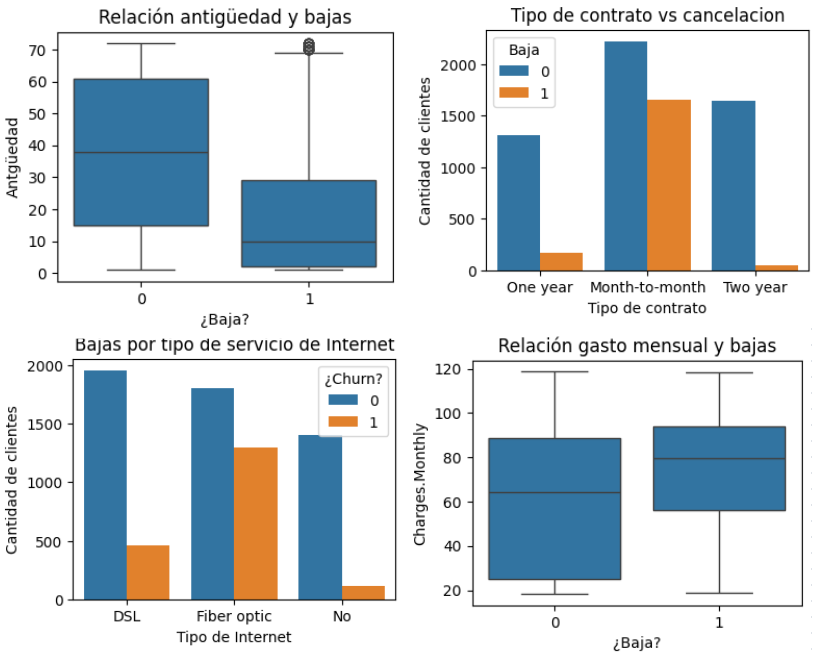

🔹 Conclusión:

Los clientes que más se dieron de baja son clientes con menos antiguedad. Esto da la pauta de que hayq ue intentar trabajar en la fidelización de los clientes

También influye en forma significativa el tipo de contrato. Los clientes con contrato mensuales son más propensos a darse de baja. Para evitarlo se podrían ofrecer más incentivos o descuentos para que elijan contratos más largos.

Dentro de los clientes con servivio de intrnet, la mayor cantidad de bajas se da en los que tienen servicio de fibra óptica. Recomiendo que se revise la calidad del servicio y comparar precios con la competencia.

Por último, los clientes que mayores gastos mensuales registran, son los que más tienen a darse de baja. Sugiero comparar precios  para mantenerse competitivos en el mercado.